In [10]:
import pandas as pd
df = pd.read_pickle('ecommerce_data_cleaned.pkl')
print("cleaned data")
df.info()


cleaned data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            5000 non-null   int64         
 1   customer_age        5000 non-null   int64         
 2   customer_gender     5000 non-null   category      
 3   product_category    5000 non-null   object        
 4   payment_method      5000 non-null   category      
 5   order_value_usd     5000 non-null   float64       
 6   delivery_time_days  5000 non-null   int64         
 7   customer_rating     5000 non-null   float64       
 8   returned            5000 non-null   object        
 9   order_date          5000 non-null   datetime64[ns]
 10  returned_status     5000 non-null   int64         
dtypes: category(2), datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 361.5+ KB


In [11]:
# Execute Summary Metrics
total_return_rate: float = df['returned_status'].mean() * 100
avg_order_rate: float = df['order_value_usd'].mean()

print(f" Overall Return Rate: {total_return_rate:.2f}%")
print(f" Ave Order Value: {avg_order_rate:.2f}")

# Return Rate by Category
category_returns = df.groupby('product_category')['returned_status'].mean().sort_values(ascending=False) * 100

print("Return Rate by Category")
print(category_returns)

 Overall Return Rate: 50.50%
 Ave Order Value: 749.67
Return Rate by Category
product_category
Beauty           52.286049
Groceries        51.373955
Home & Living    51.048089
Sports           50.646298
Electronics      49.309912
Fashion          48.296122
Name: returned_status, dtype: float64


/var/folders/pb/6bhlmzkx375g_t63x2_w3gnc0000gn/T/ipykernel_39362/2173084334.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(x=category_returns.values,y=category_returns.index, palette="viridis")


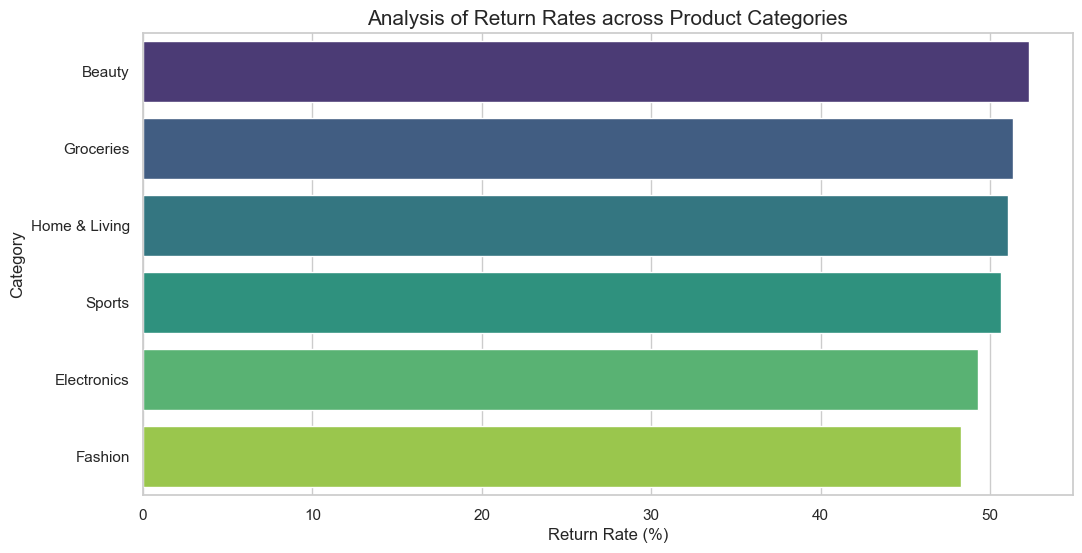

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization
# setup style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,6))

ax= sns.barplot(x=category_returns.values,y=category_returns.index, palette="viridis")

plt.title('Analysis of Return Rates across Product Categories', fontsize=15)
plt.xlabel('Return Rate (%)', fontsize=12)
plt.ylabel('Category', fontsize=12)

plt.show()


/var/folders/pb/6bhlmzkx375g_t63x2_w3gnc0000gn/T/ipykernel_39362/2299908682.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


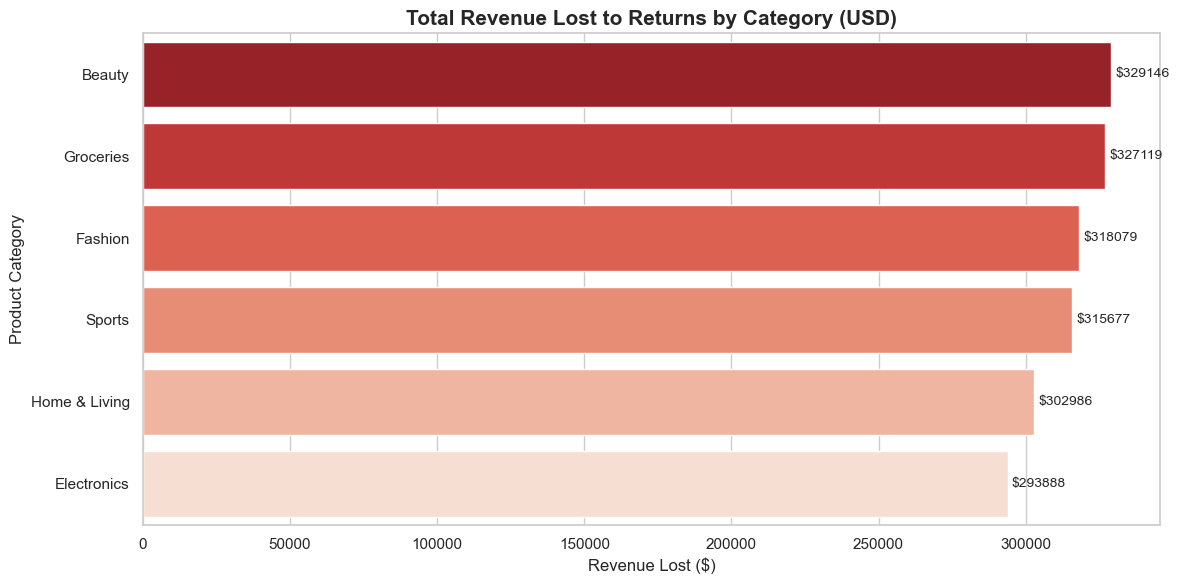

In [20]:
# --- 1. Revenue Loss Analysis Pipeline ---

revenue_leak = df.groupby('product_category').agg({
    'order_value_usd': 'sum',
    'revenue_lost_usd': 'sum'
}).rename(columns={
    'order_value_usd': 'Gross_Revenue', 
    'revenue_lost_usd': 'Lost_Revenue'
}).sort_values(by='Lost_Revenue', ascending=False) 

# 2. Visualization 
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")

# Plotting the financial impact
ax = sns.barplot(
    x=revenue_leak['Lost_Revenue'], 
    y=revenue_leak.index, 
    palette='Reds_r'
)

# Professional Formatting
plt.title("Total Revenue Lost to Returns by Category (USD)", fontsize=15, fontweight='bold')
plt.xlabel('Revenue Lost ($)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)

# Adding Data Labels (Currency Format)
for i in ax.containers:
    ax.bar_label(i, fmt='$%.0f', padding=3, fontsize=10)

plt.tight_layout()
plt.show()

Correlation Coefficient (Delivery vs. Rating): -0.02


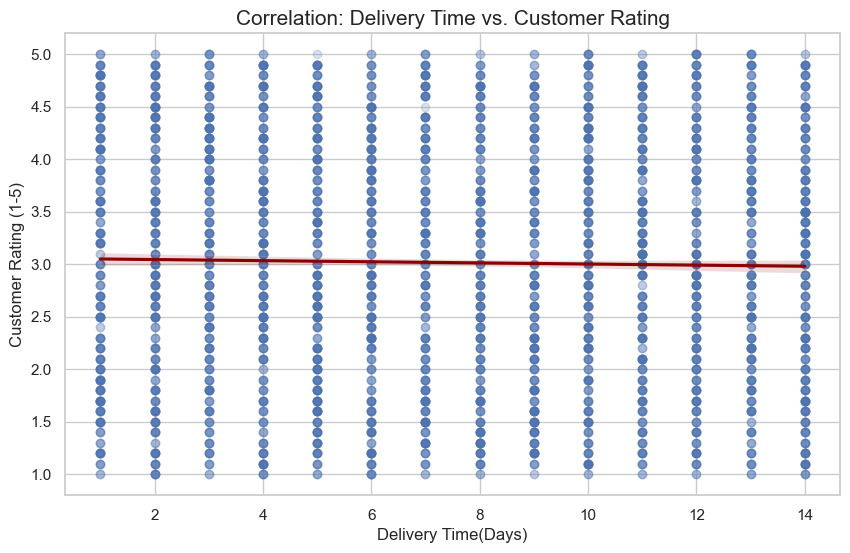

In [21]:
# Logistics Impact

plt.figure(figsize=(10, 6))


sns.regplot(data=df, x='delivery_time_days',
y='customer_rating',
    scatter_kws={'alpha': 0.2},
    line_kws={'color': 'darkred'},
)

plt.title('Correlation: Delivery Time vs. Customer Rating', fontsize=15)
plt.xlabel('Delivery Time(Days)')
plt.ylabel('Customer Rating (1-5)')

correlation = df['delivery_time_days'].corr(df['customer_rating'])

print(f"Correlation Coefficient (Delivery vs. Rating): {correlation:.2f}")
plt.show()

/var/folders/pb/6bhlmzkx375g_t63x2_w3gnc0000gn/T/ipykernel_39362/1295589040.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_risk = df.groupby('payment_method')['returned_status'].mean().sort_values(ascending=False) *100
/var/folders/pb/6bhlmzkx375g_t63x2_w3gnc0000gn/T/ipykernel_39362/1295589040.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=payment_risk.index,y=payment_risk.values, palette="mako")


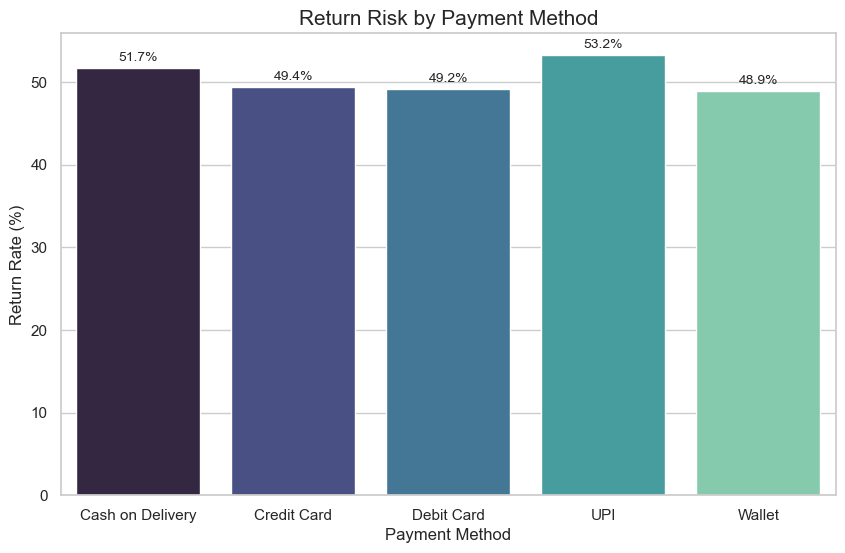

In [26]:
# Payment Risk 

payment_risk = df.groupby('payment_method')['returned_status'].mean().sort_values(ascending=False) *100

plt.figure(figsize=(10,6))

ax=sns.barplot(x=payment_risk.index,y=payment_risk.values, palette="mako")
for i in ax.containers:
    ax.bar_label(i, fmt='%.1f%%', padding=3, fontsize=10)

plt.title('Return Risk by Payment Method', fontsize=15)
plt.ylabel('Return Rate (%)')
plt.xlabel('Payment Method')
plt.show()